In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from matplotlib import cm
from matplotlib import animation
import seaborn.apionly as sns

%matplotlib inline

In [2]:
rc('font', size=8)
rc('font', family='Arial')
rc('axes', linewidth=1)
rc('xtick.major', width=0.5, size=1.5)
rc('ytick.major', width=0.5, size=1.5)
rc('text.latex', preamble=[r"\usepackage{amsmath}"])
rc('mathtext', default='regular')

In [3]:
colors = ['#F9ED69', '#F08A5D', '#B83B5E', '#6A2C70']
colors.reverse()

# Repeates of Chromatograms from 6x6x6 grid

In [4]:
chromatogram_df = pd.read_csv('../systematic_grid_data/grid.chromatograms.csv')

In [5]:
df = pd.read_csv('../systematic_grid_data/grid.results.csv')

In [6]:
duplicated = df.ix[df.duplicated(subset='meas_id', keep=False), 'meas_id'].unique()

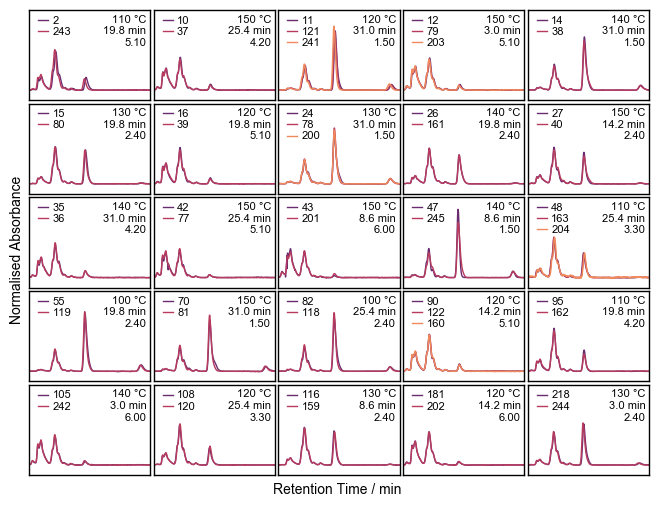

In [7]:
fig, axes = plt.subplots(figsize=(8, 6), nrows=5, ncols=5, sharex=True, sharey=True)
colors = colors

time = chromatogram_df.time / 60
for ind, ax in zip(duplicated, axes.reshape(-1)):
    repeat_ind = df.index[df.meas_id == ind].tolist()
    for i in range(len(repeat_ind)):
        area = np.trapz(chromatogram_df.ix[chromatogram_df.ix[:, repeat_ind[i]+1].notnull(), repeat_ind[i]+1])
        ax.plot(time, chromatogram_df.ix[:, repeat_ind[i]+1] / area, lw=1, color=colors[i], label=repeat_ind[i])
        
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([5,7,9,11])
    ax.tick_params(top='off')
    
    ax.legend(loc=2, frameon=False, handlelength=1.5,
              fontsize=8, labelspacing=0.1, handletextpad=0.1, borderpad=0)
    
    text = '%d \u00B0C\n%.1f min\n%.2f' %(df.temperature.iloc[repeat_ind[0]], 
                                                   df.time.iloc[repeat_ind[0]],
                                                   df.excess.iloc[repeat_ind[0]])
    ax.annotate(text, xy=(0.97, 0.95), xycoords='axes fraction', fontsize=8, ha='right', va='top')
    ax.set_xticks([])
    
axes[0,0].set_xlim(3.5, 12)
axes[0,0].set_ylim((-0.005, 0.04))

fig.text(0.51, 0.1, 'Retention Time / min', ha='center', va='center', fontsize=10)
fig.text(0.11, 0.5, 'Normalised Absorbance', rotation='vertical', ha='center', va='center', fontsize=10)

fig.subplots_adjust(hspace=0.04, wspace=0.03)
fig.savefig('/home/barnaby/Dropbox/PhD/ReactorPaper/figures/supplementary1_2.pdf', bbox_inches='tight')